# Load Necessary Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load in data

In [3]:
mouse_drug_data = pd.read_csv('data/mouse_drug_data.csv')
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinical_trial_data = pd.read_csv('data/clinicaltrial_data.csv')
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Combine the data into a single dataset

In [5]:
mouse_drug_data.sort_values(by="Mouse ID", inplace=True)
clinical_trial_data.sort_values(by="Mouse ID", inplace=True)

mouse_drug_data = mouse_drug_data.reset_index(drop=True)
clinical_trial_data = clinical_trial_data.reset_index(drop=True)

df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="left")
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,0,45.000000,0
1,a203,Infubinol,5,48.508468,0
2,a203,Infubinol,25,56.793208,1
3,a203,Infubinol,40,63.593490,2
4,a203,Infubinol,35,61.931650,2


# Tumor Response to Treatment
Store the Mean Tumor Volume Data grouped by Drug and Timepoint

In [6]:
df_groupby = df.groupby(['Drug', 'Timepoint'])
mean_tumor_volume_df = df_groupby['Tumor Volume (mm3)'].mean()
mean_tumor_volume_df

tumor_response = pd.DataFrame(mean_tumor_volume_df).reset_index()
tumor_response.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


Store the Standart Error of Tumor Volumes grouped by Drug and Timepoint

In [7]:
tumor_error = df_groupby['Tumor Volume (mm3)'].sem()
tumor_response_error = pd.DataFrame(tumor_error).reset_index()
tumor_response_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


Minor Data Munging to Re-Format the Data Frames

In [8]:
reformat_df = tumor_response.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


# Generate the Plot (with Error Bars)

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol


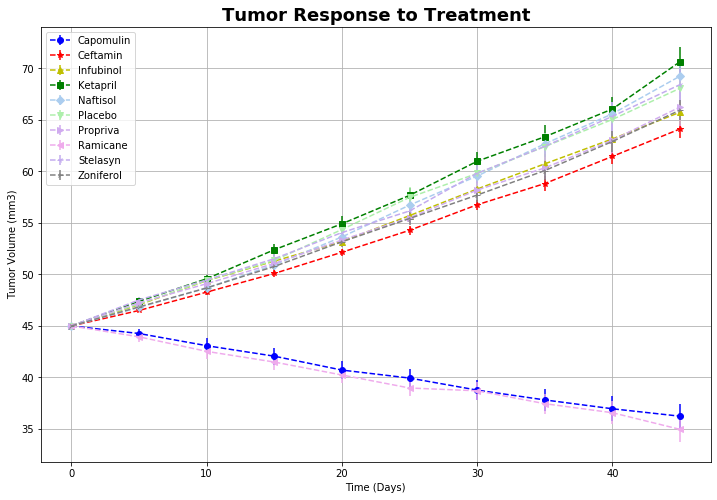

In [9]:
plt.figure(figsize=(12,8))

plt.title('Tumor Response to Treatment', fontdict={'fontweight':'bold', 'fontsize':18})

Capomulin_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Capomulin', 'Tumor Volume (mm3)']
Ceftamin_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Ceftamin', 'Tumor Volume (mm3)']
Infubinol_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Infubinol', 'Tumor Volume (mm3)']
Ketapril_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Ketapril', 'Tumor Volume (mm3)']
Naftisol_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Naftisol', 'Tumor Volume (mm3)']
Placebo_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Placebo', 'Tumor Volume (mm3)']
Propriva_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Propriva', 'Tumor Volume (mm3)']
Ramicane_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Ramicane', 'Tumor Volume (mm3)']
Stelasyn_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Stelasyn', 'Tumor Volume (mm3)']
Zoniferol_df = tumor_response_error.loc[tumor_response_error['Drug'] == 'Zoniferol', 'Tumor Volume (mm3)']

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, reformat_df['Capomulin'], yerr = Capomulin_df, color = 'b', linestyle = '--', marker = 'o', label='Capomulin')
plt.errorbar(Time, reformat_df["Ceftamin"], yerr = Ceftamin_df, color = 'r', linestyle = '--', marker = '*', label="Ceftamin")
plt.errorbar(Time, reformat_df["Infubinol"], yerr = Infubinol_df, color = 'y', linestyle = '--', marker = '^', label="Infubinol")
plt.errorbar(Time, reformat_df["Ketapril"], yerr = Ketapril_df, color = 'g', linestyle = '--', marker = 's', label="Ketapril")
plt.errorbar(Time, reformat_df["Naftisol"], yerr = Naftisol_df, color = '#abcdef', linestyle = '--', marker = 'D', label="Naftisol")
plt.errorbar(Time, reformat_df["Placebo"], yerr = Placebo_df, color = '#adefab', linestyle = '--', marker = 'v', label="Placebo")
plt.errorbar(Time, reformat_df["Propriva"], yerr = Propriva_df, color = '#d0abef', linestyle = '--', marker = '>', label="Propriva")
plt.errorbar(Time, reformat_df["Ramicane"], yerr = Ramicane_df, color = '#efabec', linestyle = '--', marker = '<', label="Ramicane")
plt.errorbar(Time, reformat_df["Stelasyn"], yerr = Stelasyn_df, color = '#c2abef', linestyle = '--', marker = '3', label="Stelasyn")
plt.errorbar(Time, reformat_df["Zoniferol"], yerr = Zoniferol_df, color = 'grey', linestyle = '--', marker = '4', label="Zoniferol")

for Drug in reformat_df:
    if Drug !='Tumor Volume (mm3)':
        print(Drug)

plt.xlabel('Time (Days)')
plt.ylabel ('Tumor Volume (mm3)')

plt.legend()
plt.grid()

plt.savefig('Tumor_Response_to_Treatment', dpi=300)
plt.show()




# Metastatic Response to Treatment
Store the Mean Met. Site Data Grouped by Drug and Timepoint 

In [10]:
df_groupby = df.groupby(['Drug', 'Timepoint'])
mean_tumor_volume_df = df_groupby['Metastatic Sites'].mean()
mean_tumor_volume_df

tumor_response = pd.DataFrame(mean_tumor_volume_df).reset_index()
tumor_response.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

In [11]:
tumor_error = df_groupby['Metastatic Sites'].sem()
tumor_error = pd.DataFrame(tumor_error).reset_index()
tumor_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Minor Data Munging to Re-Format the Data Frames

In [12]:
metastatic_df = tumor_response.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
metastatic_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Generate the Plot (with Error Bars)

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol


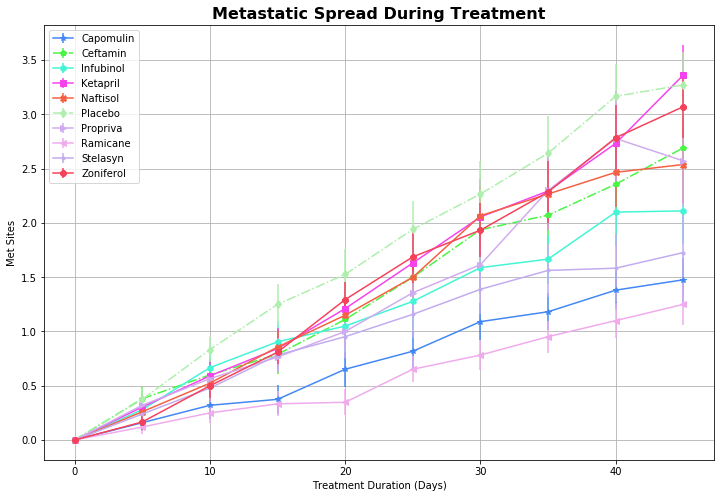

In [13]:
plt.figure(figsize=(12,8))

plt.title('Metastatic Spread During Treatment', fontdict={'fontweight':'bold', 'fontsize':16})

Capomulin_df = tumor_error.loc[tumor_response_error['Drug'] == 'Capomulin', 'Metastatic Sites']
Ceftamin_df = tumor_error.loc[tumor_response_error['Drug'] == 'Ceftamin', 'Metastatic Sites']
Infubinol_df = tumor_error.loc[tumor_response_error['Drug'] == 'Infubinol', 'Metastatic Sites']
Ketapril_df = tumor_error.loc[tumor_response_error['Drug'] == 'Ketapril', 'Metastatic Sites']
Naftisol_df = tumor_error.loc[tumor_response_error['Drug'] == 'Naftisol', 'Metastatic Sites']
Placebo_df = tumor_error.loc[tumor_response_error['Drug'] == 'Placebo', 'Metastatic Sites']
Propriva_df = tumor_error.loc[tumor_response_error['Drug'] == 'Propriva', 'Metastatic Sites']
Ramicane_df = tumor_error.loc[tumor_response_error['Drug'] == 'Ramicane', 'Metastatic Sites']
Stelasyn_df = tumor_error.loc[tumor_response_error['Drug'] == 'Stelasyn', 'Metastatic Sites']
Zoniferol_df = tumor_error.loc[tumor_response_error['Drug'] == 'Zoniferol', 'Metastatic Sites']

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, metastatic_df['Capomulin'], yerr = Capomulin_df, color = '#4287f5', linestyle = 'solid', marker = '*', label='Capomulin')
plt.errorbar(Time, metastatic_df["Ceftamin"], yerr = Ceftamin_df, color = '#48f542', linestyle = '-.', marker = 'p', label="Ceftamin")
plt.errorbar(Time, metastatic_df["Infubinol"], yerr = Infubinol_df, color = '#42f5d4', linestyle = '-', marker = 'h', label="Infubinol")
plt.errorbar(Time, metastatic_df["Ketapril"], yerr = Ketapril_df, color = '#f542ec', linestyle = '-', marker = 's', label="Ketapril")
plt.errorbar(Time, metastatic_df["Naftisol"], yerr = Naftisol_df, color = '#f56042', linestyle = 'solid', marker = 'X', label="Naftisol")
plt.errorbar(Time, metastatic_df["Placebo"], yerr = Placebo_df, color = '#adefab', linestyle = '-.', marker = 'd', label="Placebo")
plt.errorbar(Time, metastatic_df["Propriva"], yerr = Propriva_df, color = '#d0abef', linestyle = 'solid', marker = '>', label="Propriva")
plt.errorbar(Time, metastatic_df["Ramicane"], yerr = Ramicane_df, color = '#efabec', linestyle = '-', marker = '<', label="Ramicane")
plt.errorbar(Time, metastatic_df["Stelasyn"], yerr = Stelasyn_df, color = '#c2abef', linestyle = 'solid', marker = '.', label="Stelasyn")
plt.errorbar(Time, metastatic_df["Zoniferol"], yerr = Zoniferol_df, color = '#f5425a', linestyle = '-', marker = '8', label="Zoniferol")

for Drug in reformat_df:
    if Drug !='Metastatic Sites)':
        print(Drug)

plt.xlabel('Treatment Duration (Days)')
plt.ylabel ('Met Sites')

plt.legend()
plt.grid()

plt.savefig('Metastatic Spread During Treatment', dpi=300)
plt.show()





# Survival Rates

Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

In [14]:
df_groupby = df.groupby(['Drug', 'Timepoint'])
mice_count = df_groupby['Mouse ID'].count()

mice_df = pd.DataFrame(mice_count).reset_index()

rename_mice_df = mice_df.rename(columns={'Mouse ID': 'Mouse Count'})
rename_mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


Minor Data Munging to Re-Format the Data Frames

In [15]:
mouse_df = mice_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Generate the Plot (Accounting for percentages)

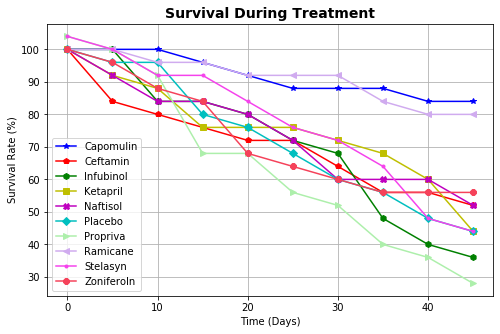

In [16]:
plt.figure(figsize=(8,5))

plt.title('Survival During Treatment', fontdict={'fontweight':'bold', 'fontsize':14})

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.plot(Time, (mouse_df['Capomulin']/25)*100, 'b.-', marker = '*', label='Capomulin')
plt.plot(Time, (mouse_df['Ceftamin']/25)*100, 'r.-', marker = 'p', label='Ceftamin')
plt.plot(Time, (mouse_df['Infubinol']/25)*100, 'g.-', marker = 'h', label='Infubinol')
plt.plot(Time, (mouse_df['Ketapril']/25)*100, 'y.-', marker = 's', label='Ketapril')
plt.plot(Time, (mouse_df['Naftisol']/25)*100, 'm.-', marker = 'X', label='Naftisol')
plt.plot(Time, (mouse_df['Placebo']/25)*100, 'c.-', marker = 'D', label='Placebo')
plt.plot(Time, (mouse_df['Propriva']/25)*100, color = '#adefab', linestyle = '-', marker = '>', label='Propriva')
plt.plot(Time, (mouse_df['Ramicane']/25)*100, color = '#d0abef', linestyle = '-', marker = '<', label='Ramicane')
plt.plot(Time, (mouse_df['Stelasyn']/25)*100, color = '#f542ec', linestyle = '-', marker = '.', label='Stelasyn')
plt.plot(Time, (mouse_df['Zoniferol']/25)*100, color = '#f5425a', linestyle = '-', marker = '8', label='Zoniferoln')


plt.xlabel('Time (Days)')
plt.ylabel ('Survival Rate (%)')

plt.legend()
plt.grid()

plt.savefig('Survival During Treatment', dpi=300)
plt.show()

# Summary Bar Graph
Calculate the percent changes for each drug

In [17]:
tumor_volume = 45
percent_changes = ((reformat_df.loc[45, :] - tumor_volume)/tumor_volume)*100

percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

Store all Relevant Percent Changes into a Tuple

In [18]:
tuple_changes = tuple(zip(percent_changes.index, percent_changes))
tuple_changes_list = list(tuple_changes)
tuple_changes_list

[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320637),
 ('Ramicane', -22.32090046276664),
 ('Stelasyn', 52.08513428789896),
 ('Zoniferol', 46.57975086509525)]

Splice the data between passing and failing drugs

In [19]:
passing_drugs =[]
failing_drugs =[]
indx_pass_drugs =[]
indx_fail_drugs =[]

for j,elements in tuple_changes_list:
    if elements>0:
        pass_drugs = elements
        passing_drugs.append(elements)
        indx_pass_drugs.append(j)
    else:
        fail_drugs = elements
        failing_drugs.append(elements)
        indx_fail_drugs.append(j)
        
passingDrugs = list(zip(indx_pass_drugs, passing_drugs))
failingDrugs = list(zip(indx_fail_drugs, failing_drugs))
print(passingDrugs)
print(failingDrugs)

[('Ceftamin', 42.51649185589744), ('Infubinol', 46.12347172785187), ('Ketapril', 57.028794686606076), ('Naftisol', 53.92334713476923), ('Placebo', 51.29796048315153), ('Propriva', 47.24117486320637), ('Stelasyn', 52.08513428789896), ('Zoniferol', 46.57975086509525)]
[('Capomulin', -19.475302667894173), ('Ramicane', -22.32090046276664)]


Orient widths. Add labels, tick marks, etc.

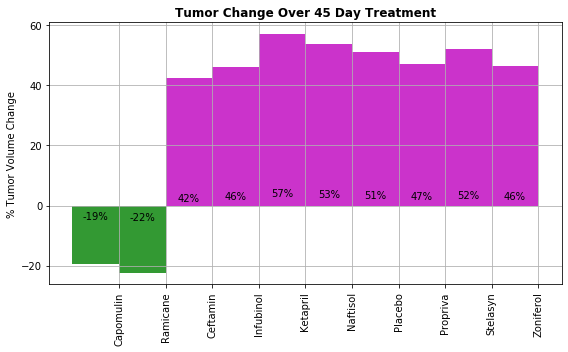

In [88]:
fig, fig_df = plt.subplots(figsize=(8, 5))
fig_df.set_title('Tumor Change Over 45 Day Treatment', fontdict={'fontweight':'bold', 'fontsize':12})

y = [percent_changes['Ceftamin'], percent_changes['Infubinol'], 
     percent_changes['Ketapril'], percent_changes['Naftisol'], 
     percent_changes['Placebo'], percent_changes['Propriva'], 
     percent_changes['Stelasyn'], percent_changes['Zoniferol']
    ]
x_axis = [0]
x_axis1 = [1]
x_axis2 =[2, 3, 4, 5, 6, 7, 8, 9]



bars = fig_df.bar(x_axis, percent_changes['Capomulin'], color = 'g', alpha=0.8, align='edge', width = -1)
bars1 = fig_df.bar(x_axis1, percent_changes['Ramicane'], color = 'g', alpha=0.8, align='edge', width = -1)
bars2 = fig_df.bar(x_axis2, y, color='m', alpha=0.8, align='edge', width = -1)    

x_labels=["Capomulin", "Ramicane", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
           "Propriva", "Stelasyn", "Zoniferol"]

plt.setp(fig_df, xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], xticklabels=["Capomulin", "Ramicane", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
           "Propriva", "Stelasyn", "Zoniferol"], 
        yticks=[-20, 0, 20, 40, 60])

plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.10)

fig_df.set_ylabel('% Tumor Volume Change')


fig_df.grid()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        fig_df.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                horizontalalignment='center', verticalalignment='top', color="black")
autolabel(bars)
autolabel(bars1)
autolabel(bars2)
fig.tight_layout()

fig.savefig('Tumor Change Over 45 Day Treatment', dpi=300)
fig.show()
